In [10]:
print("Shape:", df.shape)
df.info()


Shape: (400, 9)
<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   followers           400 non-null    int64  
 1   video_duration_sec  400 non-null    int64  
 2   video_size_mb       400 non-null    float64
 3   media_type          400 non-null    str    
 4   pet_type            400 non-null    str    
 5   post_hour           400 non-null    int64  
 6   hashtags            400 non-null    int64  
 7   comments            400 non-null    int64  
 8   engagement          400 non-null    int64  
dtypes: float64(1), int64(6), str(2)
memory usage: 28.3 KB


In [11]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
followers,400.0,NaN,NaN,NaN,4155.1675,2309.153478,85.0,2119.25,4233.0,6159.75,7993.0
video_duration_sec,400.0,NaN,NaN,NaN,47.2925,25.77864,3.0,25.0,48.0,70.0,89.0
video_size_mb,400.0,NaN,NaN,NaN,59.725675,34.125996,2.02,30.5975,58.52,89.7375,119.97
media_type,400,2,video,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pet_type,400,4,dog,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_hour,400.0,NaN,NaN,NaN,12.22,6.979138,0.0,6.0,13.0,18.0,23.0
hashtags,400.0,NaN,NaN,NaN,4.575,2.772832,0.0,2.0,5.0,7.0,9.0
comments,400.0,NaN,NaN,NaN,60.8325,35.472103,0.0,29.0,61.0,93.0,119.0
engagement,400.0,NaN,NaN,NaN,374.3425,127.956565,57.0,274.75,376.0,474.0,669.0


In [12]:
df.isna().sum()


followers             0
video_duration_sec    0
video_size_mb         0
media_type            0
pet_type              0
post_hour             0
hashtags              0
comments              0
engagement            0
dtype: int64

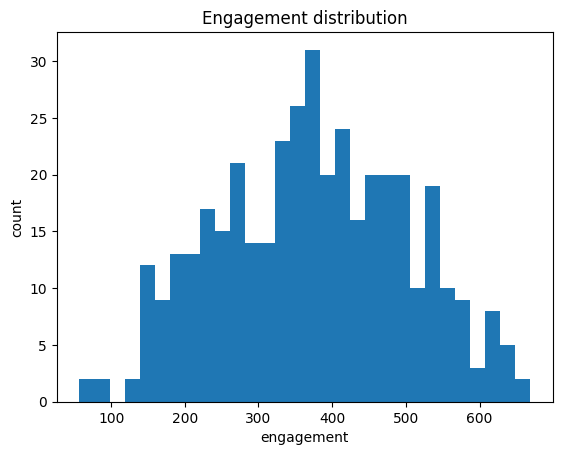

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["engagement"], bins=30)
plt.title("Engagement distribution")
plt.xlabel("engagement")
plt.ylabel("count")
plt.show()


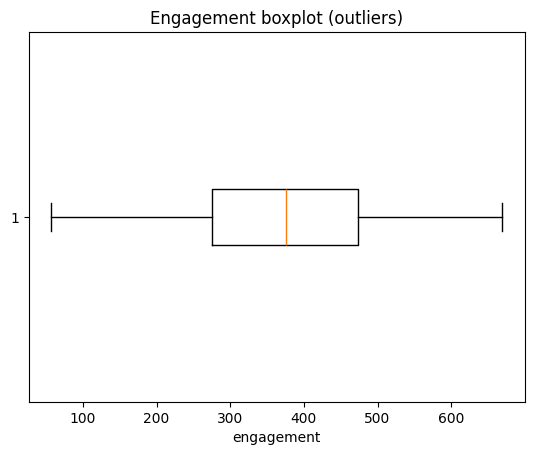

In [14]:
plt.figure()
plt.boxplot(df["engagement"], vert=False)
plt.title("Engagement boxplot (outliers)")
plt.xlabel("engagement")
plt.show()


In [15]:
df.groupby("media_type")["engagement"].agg(["count","mean","median"]).sort_values("mean", ascending=False)


,count,mean,median
media_type,,,
video,234,387.611111,384.5
photo,166,355.638554,355.0


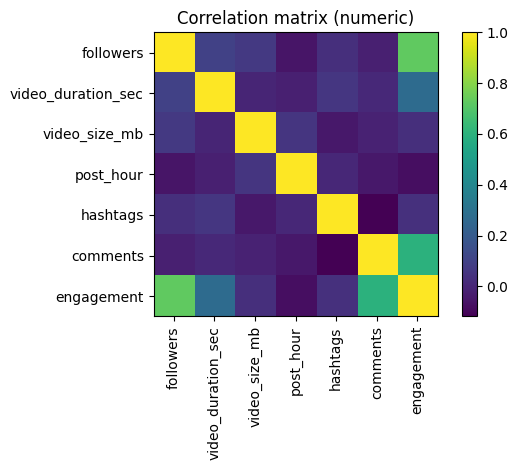

In [16]:
import numpy as np

num = df.select_dtypes(include=[np.number])
corr = num.corr(numeric_only=True)

plt.figure()
plt.imshow(corr)
plt.title("Correlation matrix (numeric)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()


In [17]:
num = df.select_dtypes(include="number")
num.corr()["engagement"].sort_values(ascending=False)


engagement            1.000000
followers             0.728519
comments              0.599715
video_duration_sec    0.274252
hashtags              0.039015
video_size_mb         0.033698
post_hour            -0.075091
Name: engagement, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

target = "engagement"

X = df.drop(columns=[target])
y = df[target]

cat_cols = ["media_type", "pet_type"]
num_cols = [c for c in X.columns if c not in cat_cols]

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", num_cols)
])

model = Pipeline([
    ("pre", pre),
    ("lr", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R2:", r2_score(y_test, pred))


MAE: 18.430322891462158
R2: 0.9694095937764963


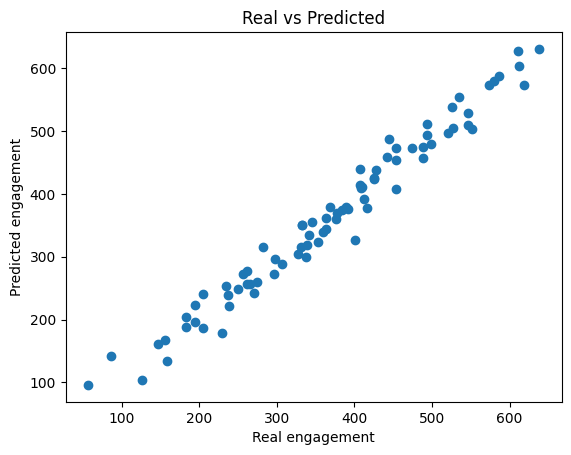

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel("Real engagement")
plt.ylabel("Predicted engagement")
plt.title("Real vs Predicted")
plt.show()



In [20]:
import joblib
joblib.dump(model, "engagement_model.pkl")


['engagement_model.pkl']